# 1. Why our data doesn't follow a Gaussian distribution
1. Sample size is too small
2. Data Resolution
3. Extreme Values
4. Long Tails

In [36]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from matplotlib import pyplot
import seaborn as sb
import numpy as np

## Problem 1: Sample size is too small

[Text(0,0.5,'Frequency'), Text(0.5,1,'Sample size = 50')]

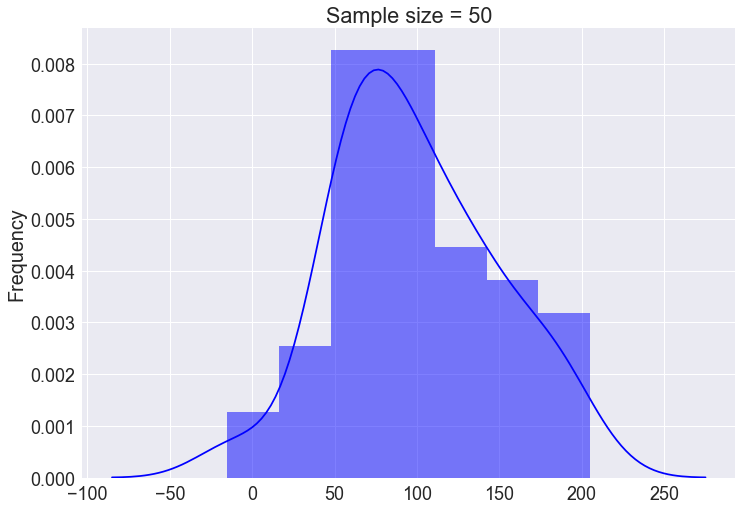

In [9]:
# seed the random number generator
seed(1)

# Generate a univariate data sample
data = 50 * randn(50) + 100

# Histogram
# No clear Gaussian distribution
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Sample size = 50', ylabel = 'Frequency')

## Solution 1: Increase sample size
- Thanks to the law of large numbers, the more data that you collect, the more likely your data will be able to used to describe the underlying population distribution.

[Text(0,0.5,'Frequency'), Text(0.5,1,'Sample size = 100')]

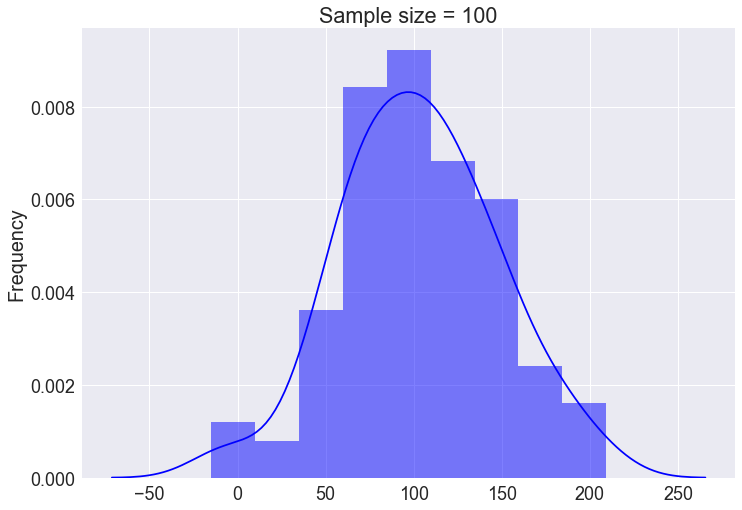

In [10]:
# Increasing the size of the sample from 50 to 100 
# can help to better expose the Gaussian shape of the data distribution.

seed(1)
data = 50 * randn(100) + 100

# Histogram
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Sample size = 100', ylabel = 'Frequency')

## Problem 2: Data Resolution 
- E.g. Round the random generated data.

[Text(0,0.5,'Frequency'), Text(0.5,1,'Data Resolution')]

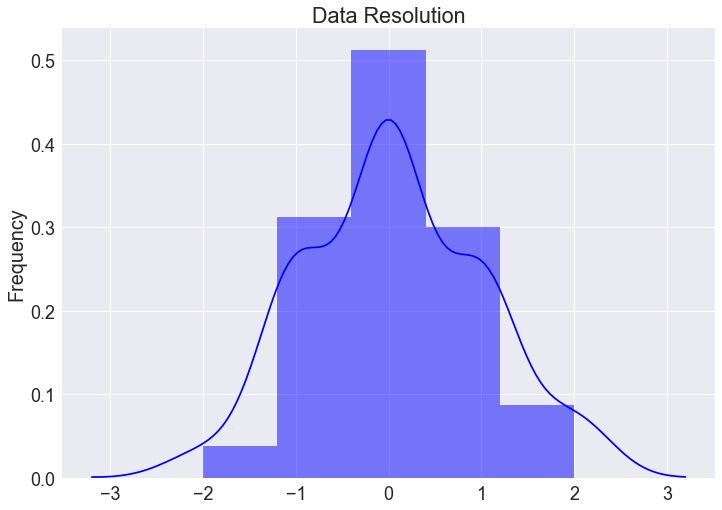

In [14]:
seed(1)

data = randn(100)

# Data Resolution: remove decimal component
round_data = data.round(0)

# Histogram
# The distribution is like a discrete distribution
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(round_data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Data Resolution', ylabel = 'Frequency')

## Solution 2: Adding the resolution back to the observations

[Text(0,0.5,'Frequency'), Text(0.5,1,'Original Data')]

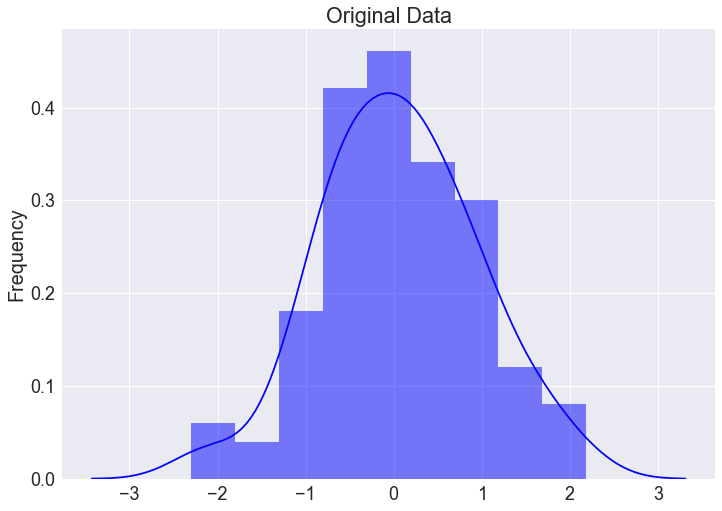

In [17]:
# data is the original random generated data
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Original Data', ylabel = 'Frequency')

## Problem 3: Extreme Values
- A data sample may have a Gaussian distribution, but may be distorted for a number of reasons.
    - Measurement error.
    - Missing data.
    - Data corruption.
    - Rare events.

In [23]:
seed(1)

# Create a data sample with size = 100, mean = 10, std = 5
data = 5 * randn(100) + 10

# Add extreme values
# An additional 10 zero-valued observations added to the distribution.
data = np.append(data, np.zeros(10))

In [24]:
# The last 10 elements are all zero-valued
data

array([18.12172682,  6.94121793,  7.35914124,  4.63515689, 14.32703815,
       -1.50769348, 18.72405882,  6.1939655 , 11.59519548,  8.75314812,
       17.31053969, -0.30070355,  8.38791398,  8.07972823, 15.66884721,
        4.50054366,  9.13785896,  5.61070791, 10.21106873, 12.91407607,
        4.49690411, 15.72361855, 14.5079536 , 12.51247169, 14.50427975,
        6.5813607 ,  9.38554887,  5.32115283,  8.6605596 , 12.65177733,
        6.54169624,  8.01623237,  6.5641365 ,  5.77397179,  6.64376935,
        9.93667701,  4.41344826, 11.17207849, 18.29901089, 13.7102208 ,
        9.04082224,  5.56185518,  6.26420853, 18.46227301, 10.25403877,
        6.81502177, 10.95457742, 20.50127568, 10.60079476, 13.08601555,
       11.5008516 ,  8.23875077,  4.28740901,  8.25328639,  8.95552883,
       12.93311596, 14.19491707, 14.65551041, 11.42793663, 14.42570582,
        6.2280103 , 16.26434078, 12.5646491 ,  8.50953582, 12.44259073,
        9.62214143, 15.65814694, 17.59908408, 20.92787703,  3.01

[Text(0,0.5,'Frequency'), Text(0.5,1,'Extreme Values')]

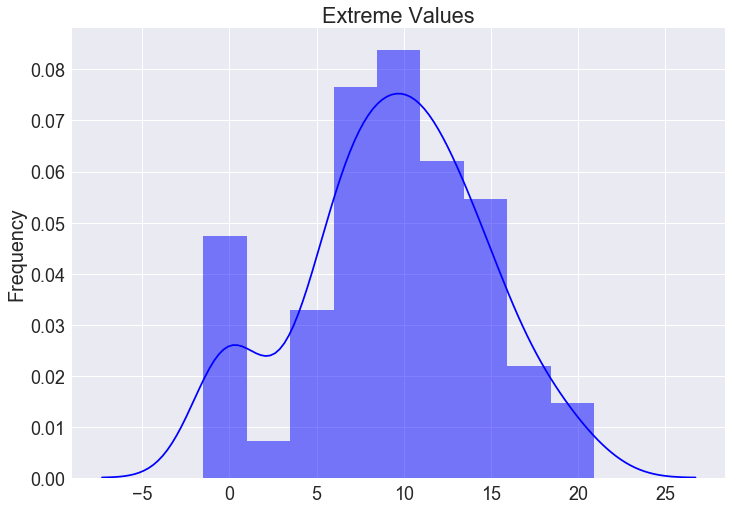

In [25]:
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Extreme Values', ylabel = 'Frequency')

## Solution 3: Remove zero-value observations

In [26]:
remove_extreme_data = data[data != 0]

[Text(0,0.5,'Frequency'), Text(0.5,1,'Extreme Values Removed')]

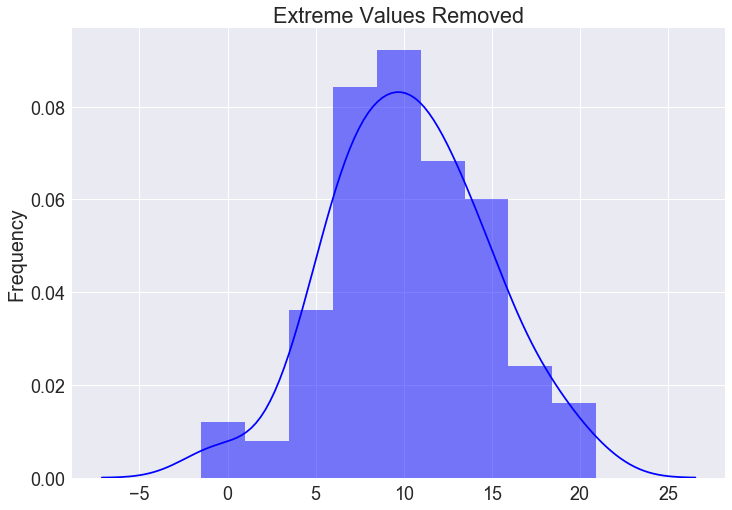

In [28]:
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(remove_extreme_data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Extreme Values Removed', ylabel = 'Frequency')

## Problem 4: Long Tails

In [51]:
seed(1)

data = 5 * randn(100) + 10
print(max(data), min(data))

# Create a long tail on the distribution.
# An additional 50 random values in the range 10-to-110 are added
tail = 10 + (rand(50) * 100)
print(max(tail), min(tail))

data = np.append(data, tail)

20.927877032665805 -1.507693484401413
108.8616154412449 11.255598015911586


[Text(0,0.5,'Frequency'), Text(0.5,1,'Long Tails Distribution')]

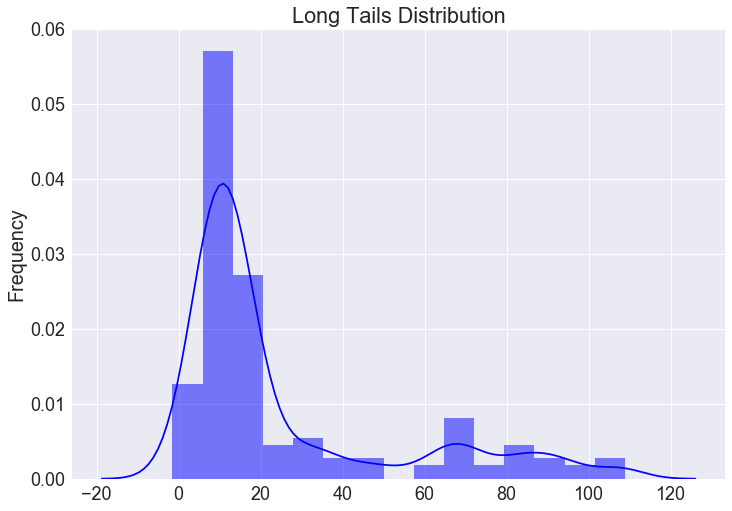

In [52]:
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Long Tails Distribution', ylabel = 'Frequency')

In [53]:
# Trim values
# Use a simple threshold, such as a value of 25, on this dataset as a cutoff point
cut_data = data[data < 25]

In [54]:
# But we lost 39 data points!
len(cut_data)

111

[Text(0,0.5,'Frequency'), Text(0.5,1,'Cut Long Tails Distribution')]

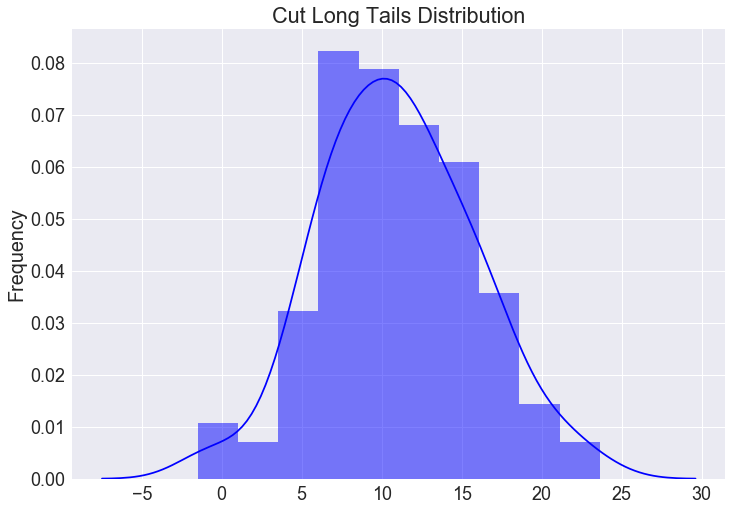

In [55]:
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(cut_data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Cut Long Tails Distribution', ylabel = 'Frequency')

# 2. Power Transforms
The distribution of the data may be normal, but the data may require a transform in order to help expose it.

Methods:
- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

A limitation of the Box-Cox transform is that it assumes that all values in the data sample are positive.

An alternative method that does not make this assumption is the Yeo-Johnson transformation.

In [62]:
seed(1)

data = 5 * randn(100) + 50

# transform the sample data to be exponential
data = np.exp(data)

[Text(0,0.5,'Frequency'), Text(0.5,1,'Exponential Distribution')]

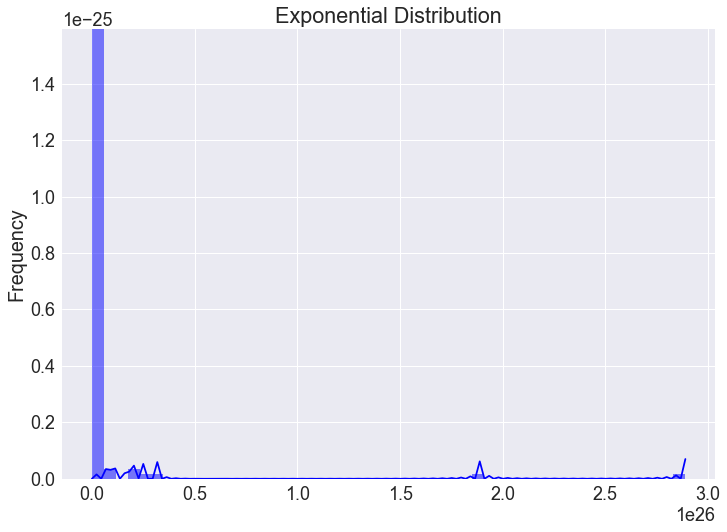

In [63]:
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'Exponential Distribution', ylabel = 'Frequency')

In [65]:
# power transform using lambda = 0 
from scipy.stats import boxcox

data = boxcox(data, 0)

[Text(0,0.5,'Frequency'), Text(0.5,1,'lambda = 0')]

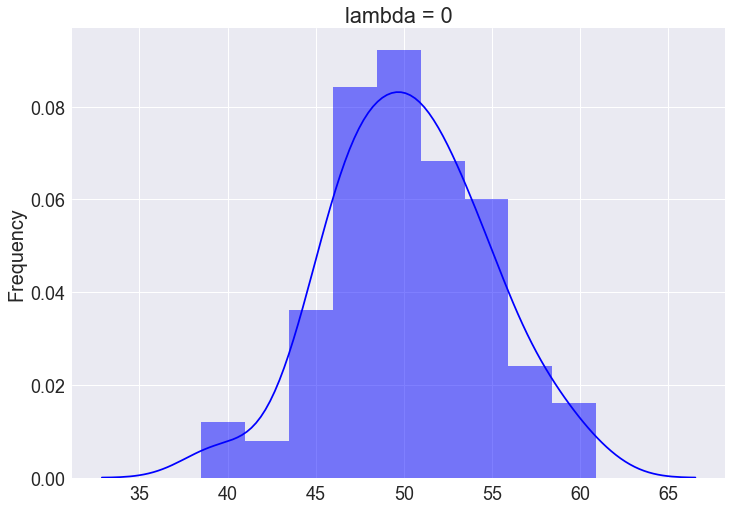

In [66]:
sb.set(rc = {'figure.figsize': (11.7, 8.27)}, font_scale = 1.8)
ax = sb.distplot(data, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
ax.set(title = 'lambda = 0', ylabel = 'Frequency')